In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

import sys, os
sys.path.append(os.path.abspath(".."))  # make sure we can import waveletae/

import numpy as np
import matplotlib.pyplot as plt
import pywt

from waveletae.preprocessing.interpolation import linear_interpolate
from waveletae.preprocessing.timing import timing_signal
from waveletae.preprocessing.wavelet import apply_dwt, inverse_dwt


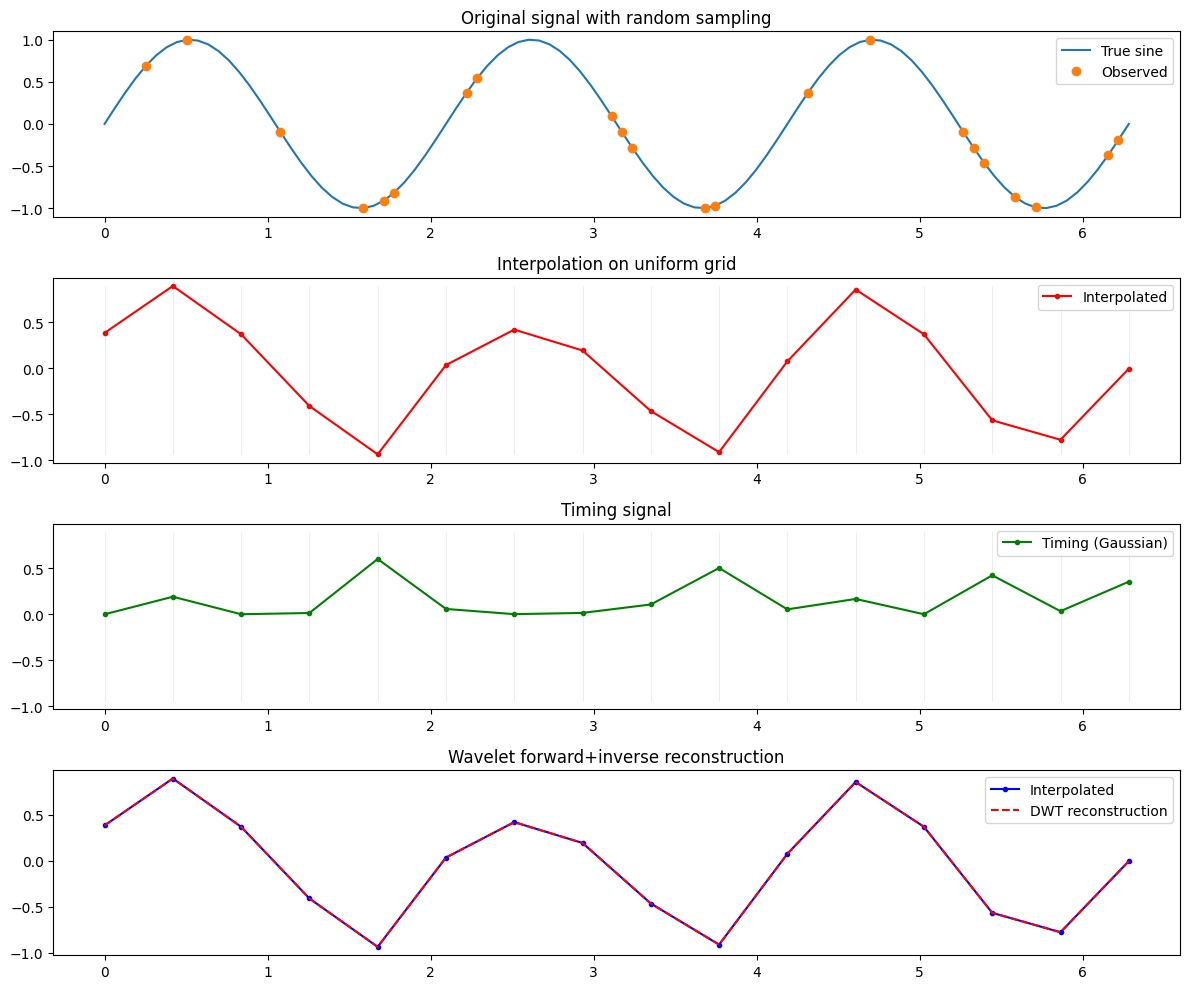

In [ ]:

# Parameters
T = 100             # original length
r = 16              # resample length
freq = 3            # sine frequency
sampling_prob = 0.2 # probability of keeping a point
gaussian_sigma = 1


# === Step 1: Generate a sine wave ===
t_true = np.linspace(0, 2*np.pi, T)
signal = np.sin(freq * t_true)  # sine with 3 cycles

# === Step 2: Randomly sample ===
rng = np.random.default_rng(42)
mask = rng.random(T) < sampling_prob  # ~30% observed
observed = signal[mask]
t_obs = t_true[mask]

# === Step 3: Interpolate onto uniform grid ===
t_resamp = np.linspace(t_true.min(), t_true.max(), r)
interp = linear_interpolate(signal, mask, r)

# === Step 4: Timing signal ===
timing = timing_signal(mask, mode="gaussian", sigma=gaussian_sigma, r=r)

# === Step 5: Wavelet forward+inverse ===
X_dwt = apply_dwt(interp[None, :])  # shape (1, r)
recon = inverse_dwt(X_dwt)[0]

# === Plot ===
fig, axes = plt.subplots(4, 1, figsize=(12, 10))

# (a) Original with missing
axes[0].plot(t_true, signal, label="True sine")
axes[0].plot(t_obs, observed, "o", label="Observed")
axes[0].set_title("Original signal with random sampling")
axes[0].legend()

# (b) Interpolated
axes[1].plot(t_resamp, interp, "r.-", label="Interpolated")
axes[1].vlines(t_resamp, interp.min(), interp.max(), color="gray", alpha=0.2, lw=0.5)
axes[1].set_title("Interpolation on uniform grid")
axes[1].legend()

# (c) Timing signal
axes[2].plot(t_resamp, timing, "g.-", label="Timing (Gaussian)")
axes[2].vlines(t_resamp, interp.min(), interp.max(), color="gray", alpha=0.2, lw=0.5)
axes[2].set_title("Timing signal")
axes[2].legend()

# (d) DWT reconstruction
axes[3].plot(t_resamp, interp, "b.-", label="Interpolated")
axes[3].plot(t_resamp, recon, "r--", label="DWT reconstruction")
axes[3].set_title("Wavelet forward+inverse reconstruction")
axes[3].legend()

plt.tight_layout()
plt.show()